## Prediction of primary and secondary radius on observed data


### Prediction on overcontact observed data
### Model used: overcontact_prim_radius, overcontact_sec_radius

In [2]:
# Libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from keras.models import load_model
from ast import literal_eval
from random import randint

In [3]:
# Overcontact data loading
data_over = pd.read_csv("observed\observed_over.csv")
data_over.head()

,Unnamed: 0,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
0,0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205,0.565838,0.271593
1,1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205,0.565838,0.271593
2,2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178,0.510294,0.286772
3,3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178,0.510294,0.286772
4,4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178,0.510294,0.286772


In [4]:
data_over = data_over.drop(columns=["Unnamed: 0"])
data_over.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205,0.565838,0.271593
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205,0.565838,0.271593
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178,0.510294,0.286772
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178,0.510294,0.286772
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178,0.510294,0.286772


In [5]:
print("Number of records of overcontact: ", len(data_over))

Number of records of overcontact:  43


In [6]:
# Curves loading
X = []
for row in data_over["curve"]:
    processed_curve = literal_eval(row)
    X.append(processed_curve)
X = np.array(X, dtype = np.float32)

In [7]:
# True values of primary and secondary radius
y_prim = np.array(data_over["primary__equivalent_radius"])
y_sec = np.array(data_over["secondary__equivalent_radius"])

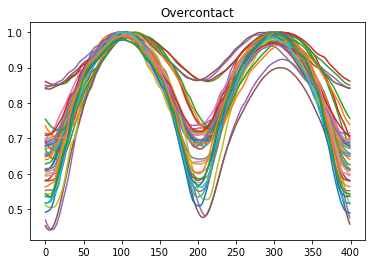

In [8]:
# Overcontact
for i in range(len(X)):
    rnd = randint(0, len(X))
    plt.plot(X[i])
plt.title('Overcontact')
plt.show()

In [9]:
# Models loading
model_prim = load_model("overcontact_prim_radius.hdf5")
model_sec = load_model("overcontact_sec_radius.hdf5")

In [10]:
# Primary radius prediction
pred_prim = model_prim.predict(X)

In [11]:
pred_prim = np.reshape(pred_prim, len(pred_prim))

In [12]:
# Secondary radius prediction
pred_sec = model_sec.predict(X)

In [13]:
pred_sec = np.reshape(pred_sec, len(pred_sec))

In [14]:
# Add predicted values to df
data_over["prim_radius_predicted"] = pred_prim
data_over["sec_radius_predicted"] = pred_sec

In [15]:
data_over.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2,primary__equivalent_radius,secondary__equivalent_radius,prim_radius_predicted,sec_radius_predicted
0,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,V,"[0.6897, 0.6901, 0.6904, 0.691, 0.6916, 0.6925...",1.01205,0.565838,0.271593,0.511116,0.294504
1,0.169,75.46,2.080,2.080,6215.0,6141.0,0.494108,overcontact,N,http://liber.onu.edu.ua/pdf/astro/all/OAP_14/0...,AH Aur,B,"[0.656, 0.6549, 0.6537, 0.6525, 0.6516, 0.6513...",1.01205,0.565838,0.271593,0.558508,0.272599
2,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,V,"[0.6688, 0.6646, 0.6608, 0.6572, 0.6539, 0.651...",1.05178,0.510294,0.286772,0.421582,0.346266
3,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,I,"[0.6932, 0.6884, 0.6841, 0.6804, 0.6773, 0.674...",1.05178,0.510294,0.286772,0.433743,0.277056
4,0.270,81.70,2.357,2.357,6500.0,6180.0,0.421522,overcontact,Y,https://iopscience.iop.org/article/10.1088/000...,AKHer,R,"[0.6524, 0.6518, 0.652, 0.6532, 0.6554, 0.6582...",1.05178,0.510294,0.286772,0.297975,0.367025


### Comparison of predictions

In [24]:
# Comparison of predicted and true values
comp_over = pd.DataFrame(data ={"name": data_over.name,
                                "filter": data_over["filter"],
                                "true_prim": data_over.primary__equivalent_radius,
                                "prim_predicted": data_over.prim_radius_predicted,
                                "true_sec": data_over.secondary__equivalent_radius,
                                "sec_predicted": data_over.sec_radius_predicted})
# comp_over["diff_prim"] = data_over.primary__equivalent_radius - data_over.prim_radius_predicted_O
# comp_over["prim_abs_diff"] = abs(comp_over["diff_prim"])
# comp_over["diff_sec"] = data_over.secondary__equivalent_radius - data_over.sec_radius_predicted_O
# comp_over["sec_abs_diff"] = abs(comp_over["diff_sec"])
# comp_over["prim_rel_error"] = comp_over["prim_abs_diff"] / comp_over["true_prim"]
# comp_over["sec_rel_error"] = comp_over["sec_abs_diff"] / comp_over["true_sec"]
comp_over.head()



,name,filter,true_prim,prim_predicted,true_sec,sec_predicted
0,AH Aur,V,0.565838,0.511116,0.271593,0.294504
1,AH Aur,B,0.565838,0.558508,0.271593,0.272599
2,AKHer,V,0.510294,0.421582,0.286772,0.346266
3,AKHer,I,0.510294,0.433743,0.286772,0.277056
4,AKHer,R,0.510294,0.297975,0.286772,0.367025


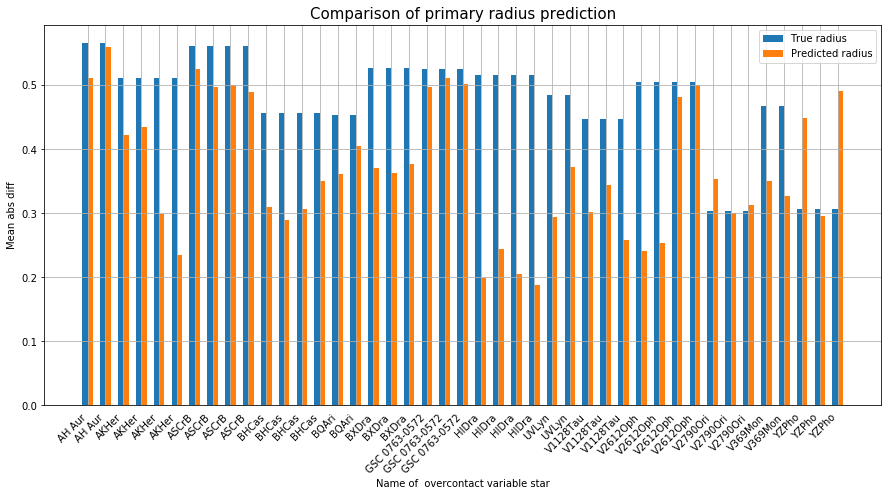

In [55]:
fig, ax = plt.subplots(figsize=(15,7))
x = np.arange(len(comp_over))
width = 0.3
plt.bar(x-0.15, data_over.primary__equivalent_radius, width, label='True radius')
plt.bar(x+0.15, data_over.prim_radius_predicted, width, label='Predicted radius')
plt.title('Comparison of primary radius prediction', fontsize=15)
plt.xticks(x, comp_over.name, rotation=45, ha='right')
ax.set_ylabel("Mean abs diff")
ax.set_xlabel("Name of  overcontact variable star")
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend()
plt.grid(b="on")
plt.savefig('comp_primRadius_Overcontact.png')
plt.show()

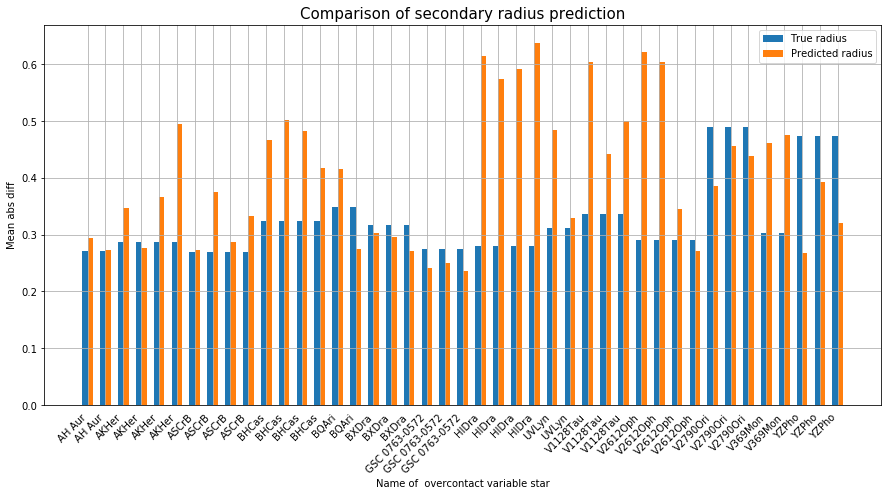

In [54]:
fig, ax = plt.subplots(figsize=(15,7))
x = np.arange(len(comp_over))
width = 0.3
plt.bar(x-0.15, data_over.secondary__equivalent_radius, width, label='True radius')
plt.bar(x+0.15, data_over.sec_radius_predicted, width, label='Predicted radius')
plt.title('Comparison of secondary radius prediction', fontsize=15)
plt.xticks(x, comp_over.name, rotation=45, ha='right')
ax.set_ylabel("Mean abs diff")
ax.set_xlabel("Name of  overcontact variable star")
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend()
plt.grid(b="on")
plt.savefig('comp_secRadius_Overcontact.png')
plt.show()

In [27]:
comp_over.to_csv("comparison_Overcontact_radius_prediction.csv")

## Prediction on detached observed data
## Model used: detached_prim_radius, detached_sec_radius

In [37]:
data_det = pd.read_csv("observed\observed_det.csv")
data_det.head()

,Unnamed: 0,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
0,0,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505...",1.653154,0.27175,0.316676
1,1,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781...",1.653154,0.27175,0.316676
2,2,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546...",1.653154,0.27175,0.316676
3,3,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263...",1.653154,0.27175,0.316676
4,4,0.366,88.7,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.4113, 0.4087, 0.4076, 0.4083, 0.4108, 0.415...",1.721739,0.41515,0.295522


In [38]:
data_det = data_det.drop(columns = ["Unnamed: 0"])
data_det.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2,primary__equivalent_radius,secondary__equivalent_radius
0,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505...",1.653154,0.27175,0.316676
1,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781...",1.653154,0.27175,0.316676
2,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546...",1.653154,0.27175,0.316676
3,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263...",1.653154,0.27175,0.316676
4,0.366,88.7,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.4113, 0.4087, 0.4076, 0.4083, 0.4108, 0.415...",1.721739,0.41515,0.295522


In [39]:
# Curves loading
X = []
for row in data_det["curve"]:
    processed_curve = literal_eval(row)
    X.append(processed_curve)
X = np.array(X, dtype = np.float32)

In [40]:
# True values of primary and secondary radius
y_prim = []
y_sec = []

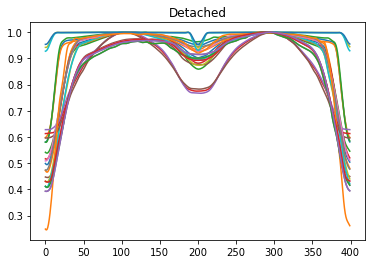

In [41]:
# Detached
for i in range(len(X)):
    rnd = randint(0, len(X))
    plt.plot(X[i])
plt.title('Detached')
plt.show()

In [42]:
# Models loading
model_prim = load_model("detached_prim_radius.hdf5")
model_sec = load_model("detached_sec_radius.hdf5")

In [43]:
# Primary radius prediction
pred_prim = model_prim.predict(X)
pred_prim = np.reshape(pred_prim, len(pred_prim))

In [44]:
# Secondary radius prediction
pred_sec = model_sec.predict(X)
pred_sec = np.reshape(pred_sec, len(pred_sec))

In [45]:
# Add predicted values to df
data_det["prim_radius_predicted"] = pred_prim
data_det["sec_radius_predicted"] = pred_sec

In [46]:
data_det.head()

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2,primary__equivalent_radius,secondary__equivalent_radius,prim_radius_predicted,sec_radius_predicted
0,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505...",1.653154,0.27175,0.316676,0.265252,0.300675
1,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781...",1.653154,0.27175,0.316676,0.258252,0.286831
2,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546...",1.653154,0.27175,0.316676,0.253416,0.343769
3,0.484,76.3,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263...",1.653154,0.27175,0.316676,0.271040,0.334531
4,0.366,88.7,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.4113, 0.4087, 0.4076, 0.4083, 0.4108, 0.415...",1.721739,0.41515,0.295522,0.280792,0.347759


### Comparison of predictions

In [47]:
# Comparison of predicted and true values
comp_det = pd.DataFrame(data ={"name": data_det.name,
                                "filter": data_det["filter"],
                                "true_prim": data_det.primary__equivalent_radius,
                                "prim_predicted": data_det.prim_radius_predicted,
                                "true_sec": data_det.secondary__equivalent_radius,
                                "sec_predicted": data_det.sec_radius_predicted})
# comp_over["diff_prim"] = data_over.primary__equivalent_radius - data_over.prim_radius_predicted_O
# comp_over["prim_abs_diff"] = abs(comp_over["diff_prim"])
# comp_over["diff_sec"] = data_over.secondary__equivalent_radius - data_over.sec_radius_predicted_O
# comp_over["sec_abs_diff"] = abs(comp_over["diff_sec"])
# comp_over["prim_rel_error"] = comp_over["prim_abs_diff"] / comp_over["true_prim"]
# comp_over["sec_rel_error"] = comp_over["sec_abs_diff"] / comp_over["true_sec"]
comp_det.head()


,name,filter,true_prim,prim_predicted,true_sec,sec_predicted
0,ATPeg,V,0.27175,0.265252,0.316676,0.300675
1,ATPeg,I,0.27175,0.258252,0.316676,0.286831
2,ATPeg,R,0.27175,0.253416,0.316676,0.343769
3,ATPeg,B,0.27175,0.271040,0.316676,0.334531
4,BUVul,V,0.41515,0.280792,0.295522,0.347759


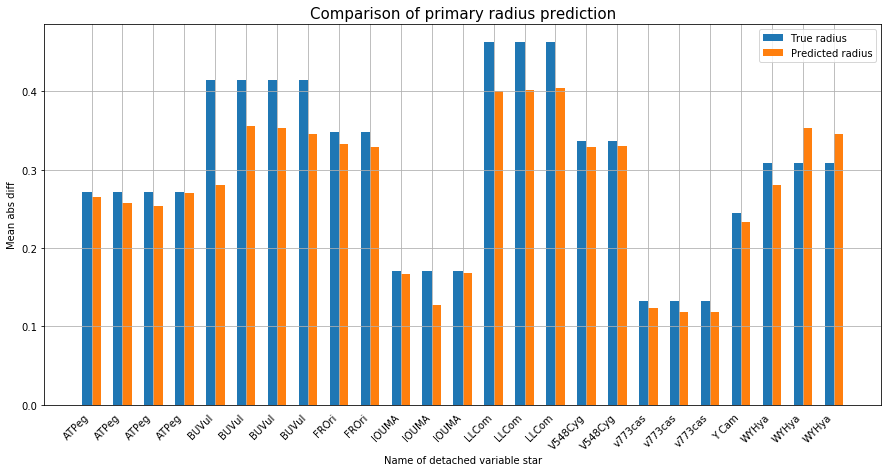

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
x = np.arange(len(comp_det))
width = 0.3
plt.bar(x-0.15, comp_det.true_prim, width, label='True radius')
plt.bar(x+0.15, comp_det.prim_predicted, width, label='Predicted radius')
plt.title('Comparison of primary radius prediction', fontsize=15)
plt.xticks(x, comp_det.name, rotation=45, ha='right')
ax.set_ylabel("Mean abs diff")
ax.set_xlabel("Name of detached variable star")
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend()
plt.grid(b="on")
plt.savefig('comp_primRadius_Detached.png')
plt.show()

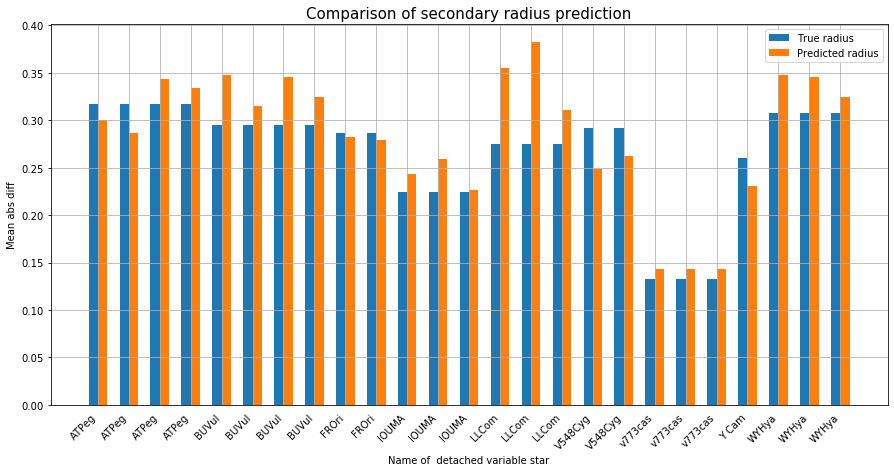

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
x = np.arange(len(comp_det))
width = 0.3
plt.bar(x-0.15, comp_det.true_sec, width, label='True radius')
plt.bar(x+0.15, comp_det.sec_predicted, width, label='Predicted radius')
plt.title('Comparison of secondary radius prediction', fontsize=15)
plt.xticks(x, comp_det.name, rotation=45, ha='right')
ax.set_ylabel("Mean abs diff")
ax.set_xlabel("Name of  detached variable star")
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend()
plt.grid(b="on")
plt.savefig('comp_secRadius_Detached.png')
plt.show()

In [51]:
comp_det.to_csv("comparison_Detached_radius_prediction.csv")